In [10]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso ,LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [11]:
#data
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['Price']= boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [13]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
# Multicolinearity 


X = boston_df.drop(['Price'],axis=1)
y= boston_df['Price']

In [15]:
# Data Splitting and Scaling
#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [16]:
dt_classifier = DecisionTreeRegressor()
dt_classifier.fit(X_train,y_train)

score = dt_classifier.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_classifier.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))



R-squared Train  : 1.0
R-squared Test  : 0.7949220340014926
MSE : 18.79631578947368
RMSE : 4.335471807020971


[Text(422.56620065789474, 527.6117647058824, 'X[12] <= 9.545\nmse = 81.189\nsamples = 354\nvalue = 22.34'),
 Text(216.57510964912282, 495.63529411764705, 'X[5] <= 7.435\nmse = 78.714\nsamples = 136\nvalue = 29.99'),
 Text(127.50109649122808, 463.6588235294118, 'X[7] <= 1.485\nmse = 45.062\nsamples = 117\nvalue = 27.666'),
 Text(125.32565789473685, 431.6823529411765, 'mse = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(129.67653508771932, 431.6823529411765, 'X[5] <= 6.542\nmse = 28.375\nsamples = 113\nvalue = 26.875'),
 Text(53.77412280701755, 399.7058823529412, 'X[5] <= 6.132\nmse = 11.126\nsamples = 53\nvalue = 22.892'),
 Text(17.81140350877193, 367.7294117647059, 'X[12] <= 7.41\nmse = 7.679\nsamples = 23\nvalue = 20.765'),
 Text(10.87719298245614, 335.7529411764706, 'X[12] <= 6.85\nmse = 3.794\nsamples = 5\nvalue = 23.92'),
 Text(8.701754385964913, 303.7764705882353, 'X[2] <= 15.195\nmse = 0.737\nsamples = 4\nvalue = 23.025'),
 Text(6.526315789473685, 271.8, 'X[6] <= 30.65\nmse = 0.26\nsam

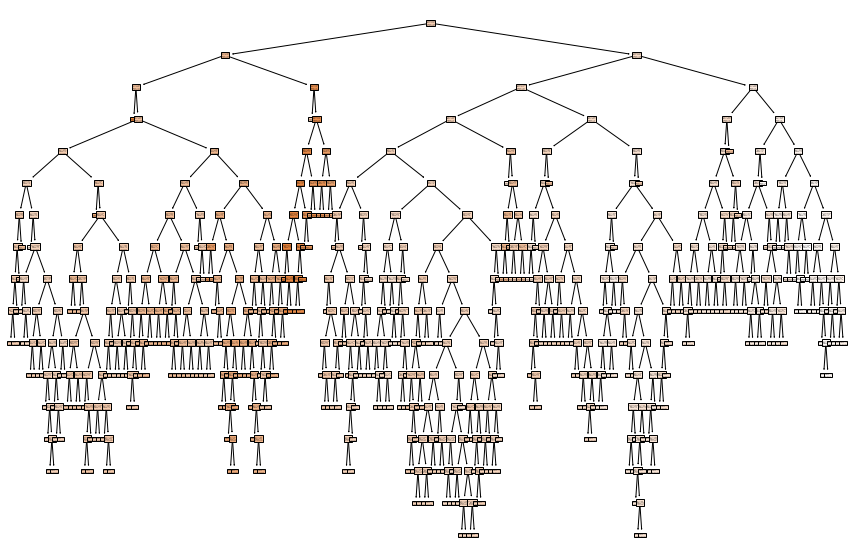

In [17]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier,filled=True)

In [18]:
dt_classifier = DecisionTreeRegressor(max_depth=4)
dt_classifier.fit(X_train,y_train)

score = dt_classifier.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_classifier.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))



R-squared Train  : 0.8857388736713648
R-squared Test  : 0.752546394167956
MSE : 22.68023332402711
RMSE : 4.762376856573523


[Text(368.28, 489.24, 'X[12] <= 9.545\nmse = 81.189\nsamples = 354\nvalue = 22.34'),
 Text(167.39999999999998, 380.52000000000004, 'X[5] <= 7.435\nmse = 78.714\nsamples = 136\nvalue = 29.99'),
 Text(66.96, 271.8, 'X[7] <= 1.485\nmse = 45.062\nsamples = 117\nvalue = 27.666'),
 Text(33.48, 163.08000000000004, 'mse = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(100.44, 163.08000000000004, 'X[5] <= 6.542\nmse = 28.375\nsamples = 113\nvalue = 26.875'),
 Text(66.96, 54.360000000000014, 'mse = 11.126\nsamples = 53\nvalue = 22.892'),
 Text(133.92, 54.360000000000014, 'mse = 17.222\nsamples = 60\nvalue = 30.393'),
 Text(267.84, 271.8, 'X[5] <= 8.589\nmse = 47.9\nsamples = 19\nvalue = 44.3'),
 Text(234.35999999999999, 163.08000000000004, 'X[10] <= 17.9\nmse = 21.137\nsamples = 18\nvalue = 45.544'),
 Text(200.88, 54.360000000000014, 'mse = 13.034\nsamples = 14\nvalue = 47.093'),
 Text(267.84, 54.360000000000014, 'mse = 11.737\nsamples = 4\nvalue = 40.125'),
 Text(301.32, 163.08000000000004, 'mse = 0.0

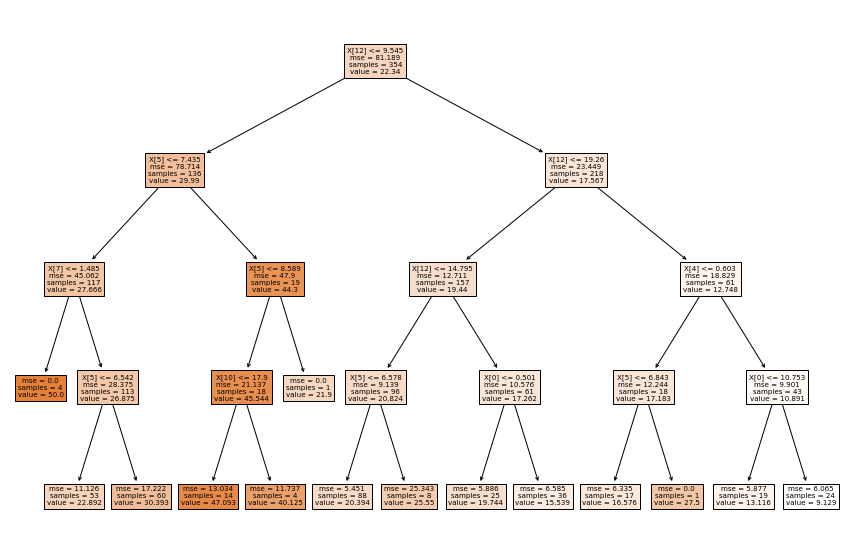

In [19]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier,filled=True)

In [45]:
dt_classifier = DecisionTreeRegressor(max_depth=9)
dt_classifier.fit(X_train,y_train)

score = dt_classifier.score(X_train,y_train)
print("R-squared Train  :", score)

score = dt_classifier.score(X_test, y_test)
print("R-squared Test  :", score)

y_pred = dt_classifier.predict(X_test)

mse = mean_squared_error(y_test,y_pred)
print("MSE :",mse)
print("RMSE :",mse**(1/2.0))



R-squared Train  : 0.9934293706973447
R-squared Test  : 0.7835470049281086
MSE : 19.838888244962767
RMSE : 4.454086690328643


[Text(390.4100194552529, 516.4200000000001, 'X[12] <= 9.545\nmse = 81.189\nsamples = 354\nvalue = 22.34'),
 Text(191.64287451361866, 462.06000000000006, 'X[5] <= 7.435\nmse = 78.714\nsamples = 136\nvalue = 29.99'),
 Text(97.90783073929961, 407.70000000000005, 'X[7] <= 1.485\nmse = 45.062\nsamples = 117\nvalue = 27.666'),
 Text(94.6510214007782, 353.34000000000003, 'mse = 0.0\nsamples = 4\nvalue = 50.0'),
 Text(101.164640077821, 353.34000000000003, 'X[5] <= 6.542\nmse = 28.375\nsamples = 113\nvalue = 26.875'),
 Text(41.52431906614786, 298.98, 'X[5] <= 6.132\nmse = 11.126\nsamples = 53\nvalue = 22.892'),
 Text(21.169260700389106, 244.62, 'X[12] <= 7.41\nmse = 7.679\nsamples = 23\nvalue = 20.765'),
 Text(13.027237354085603, 190.26000000000005, 'X[8] <= 14.5\nmse = 3.794\nsamples = 5\nvalue = 23.92'),
 Text(9.770428015564203, 135.90000000000003, 'X[9] <= 359.0\nmse = 0.737\nsamples = 4\nvalue = 23.025'),
 Text(6.5136186770428015, 81.54000000000002, 'X[8] <= 2.5\nmse = 0.26\nsamples = 3\nva

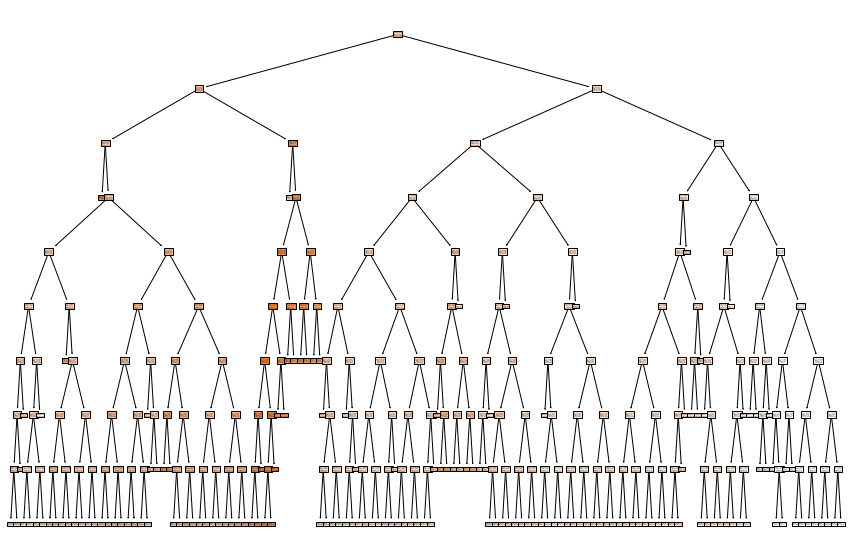

In [46]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_classifier,filled=True)